<a href="https://colab.research.google.com/github/Santarup/Exploratory-Data-Analysis-of-Car-Features/blob/master/EDA_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Car Features**

# Context
In this project, it is required to perform Exploratory data analysis on how the different features of a car and its price are related. The data comes from the Kaggle dataset "**Car Features and MSRP**". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features.

# Objective
The objective of the project is to do data pre-processing and exploratory data analysis of the dataset.

# Step 1
### 1.1 Importing the necessary libraries

In [111]:
import numpy as np                                            #Numerical analysis
import pandas as pd                                           #Dataset manipulation
import seaborn as sns                                         #Data visualisation
import matplotlib.pyplot as plt                               #Basic plotting
%matplotlib inline 
plt.rcParams["figure.figsize"] = (20,10)

### 1.2 Importing the dataset and load the data into data frame
The dataset is imported from GitHub repository and loaded in Pandas dataframe.

In [112]:
url = 'https://raw.githubusercontent.com/Santarup/Exploratory-Data-Analysis-of-Car-Features/master/data.csv'
df = pd.read_csv(url)                                          # Dataset is now stored in a Pandas Dataframe

In [113]:
df.head(5)                                                     #To display the top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [114]:
df.tail(5)                                                      #To display the bottom 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 1.3 Checking the datatype
This step is important to ensure that all the data of a particular column are of same datatype.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### 1.4 Checking the statistical summary

In [116]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Step 2: Dropping irrelevant columns
A useful dataset is one that has only relevant information in it. Here, the columns such as Engine Fuel Type, Number of Doors and Market Category may not be very relevant for analysing the different features of a car with its price.

In [117]:
df= df.drop(['Engine Fuel Type', 'Number of Doors', 'Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# Step 3: Renaming the columns
To improve readability of the dataset, the previous names of several columns are modified.

In [118]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# Step 4
### 4.1 Deduplication of values in the data
'Duplication' just means that the dataset has repeated data in it. Duplication can lead to make incorrect conclusions by leading to believe that some observations are more common than they really are and ML model assign more weigh to those datapoints. Removing duplicates is called 'Deduplication'. 



In [119]:
df.shape                                                                          #Number of rows and columns of the dataset at present

(11914, 13)

In [120]:
duplicate_val_df = df[df.duplicated()]                                            #Number of duplicate rows of the dataframe
print("Number of rows with duplicate values: ", duplicate_val_df.shape)

Number of rows with duplicate values:  (792, 13)


In [121]:
df = df.drop_duplicates()                                                          #Dropping the duplicate rows
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [122]:
df.shape                                                                            #Number of rows and columns of the dataset after deduplication

(11122, 13)

### 4.2 Removing the null values or missing data
There are two basic ways to remove null values-

*   By dropping the rows containing null or missing values
*   Imputing the missing values with mean or median






In [123]:
print(df.isnull().sum())                                                          #column-wise sum of missing values

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


So, out of 11122 values HP and Cylinders have 69 and 30 missing values respectively. As the quantity of missing values is very small that is why dropping those values will not affect the whole dataset much.

In [124]:
df = df.dropna()                                                                  #Dropping the missing values.
df.count()                                                                        #Number of rows after dropping missing values

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [125]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# Step 5: Detecting and removing outliers
In statistics, an outlier is an observation point that is distant from other observations. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in the data. Outliers are one of the primary reasons for resulting in a less accurate model, so it is recommended to remove outliers.There are two types of analysis to find the outliers- Uni-variate(one variable outlier analysis) and Multi-variate(two or more variable outlier analysis). Here, box plot is used to identify different Uni-variate outliers.

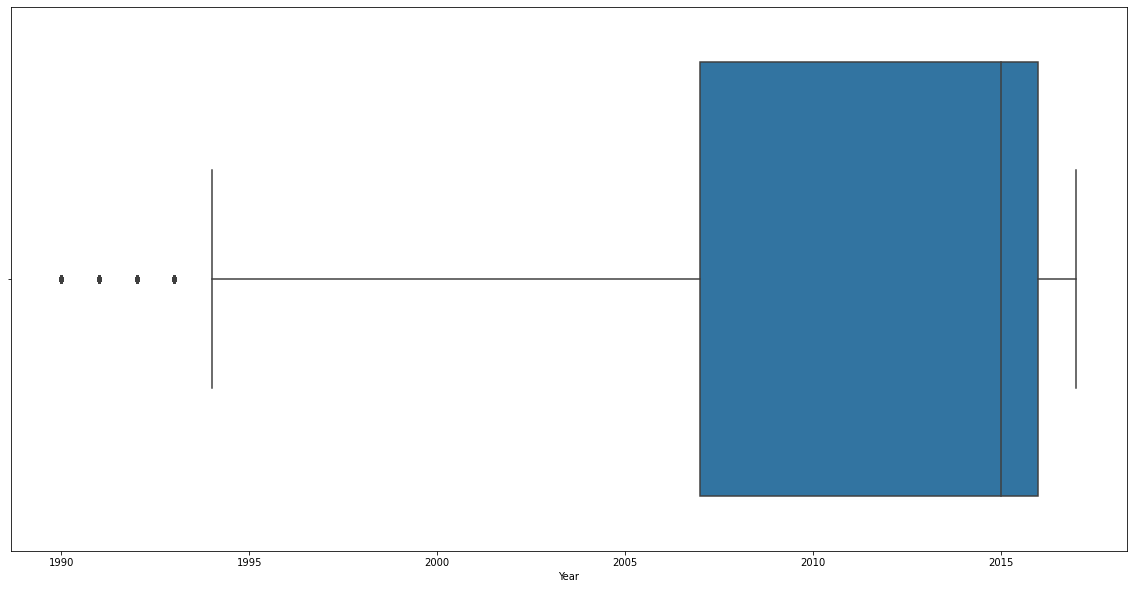

In [126]:
sns.boxplot(x=df['Year'])                                                         #Detecting outliers for the column 'Year'

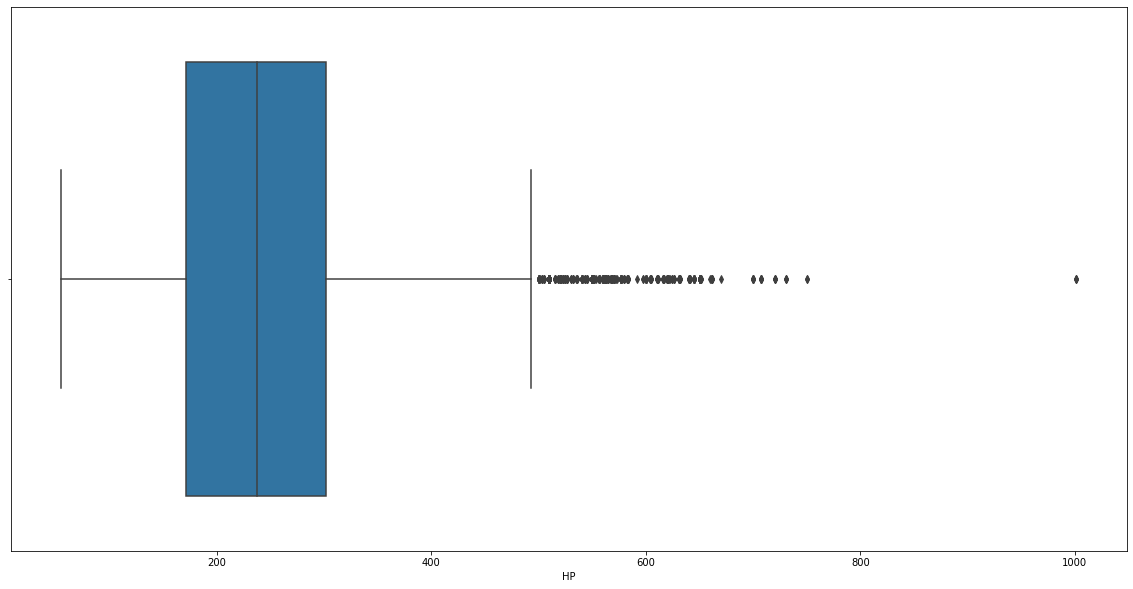

In [127]:
sns.boxplot(x=df['HP'])                                                              #Detecting outliers for the column 'HP'

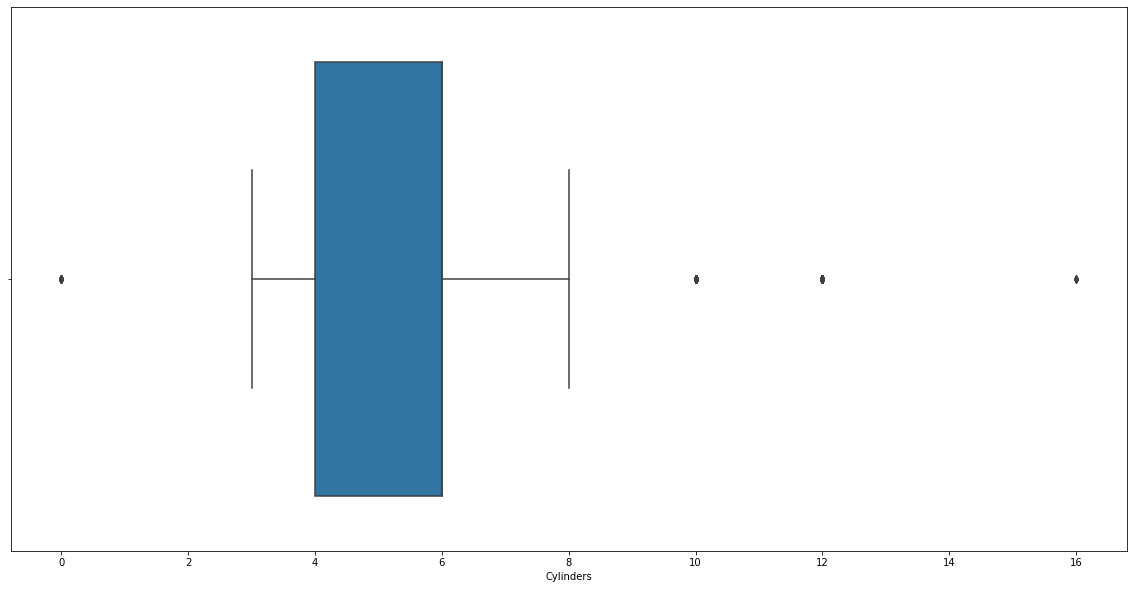

In [128]:
sns.boxplot(x=df['Cylinders'])                                                      #Detecting outliers for the column 'Cylinders'

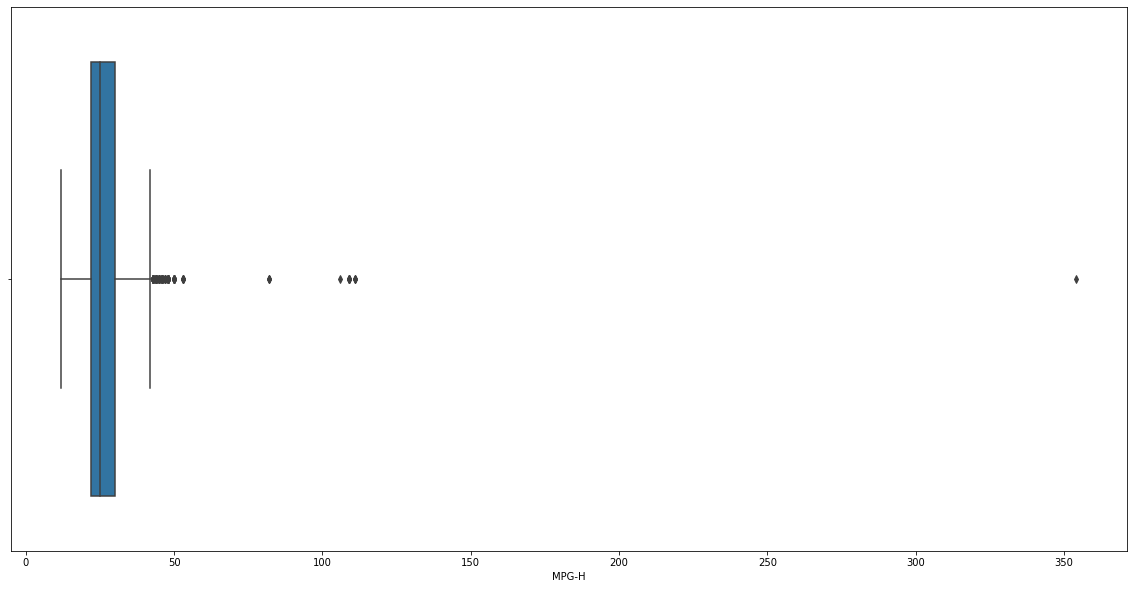

In [129]:
sns.boxplot(x=df['MPG-H'])                                                        #Detecting outliers for the column 'MPG-H'

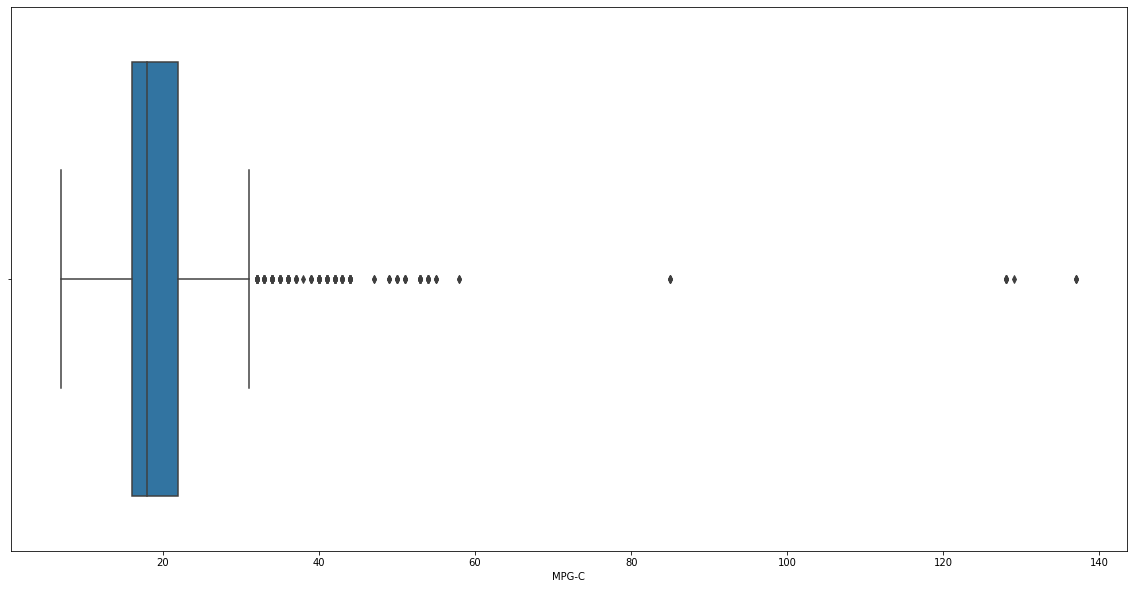

In [130]:
sns.boxplot(x=df['MPG-C'])                                                        #Detecting outliers for the column 'MPG-C'

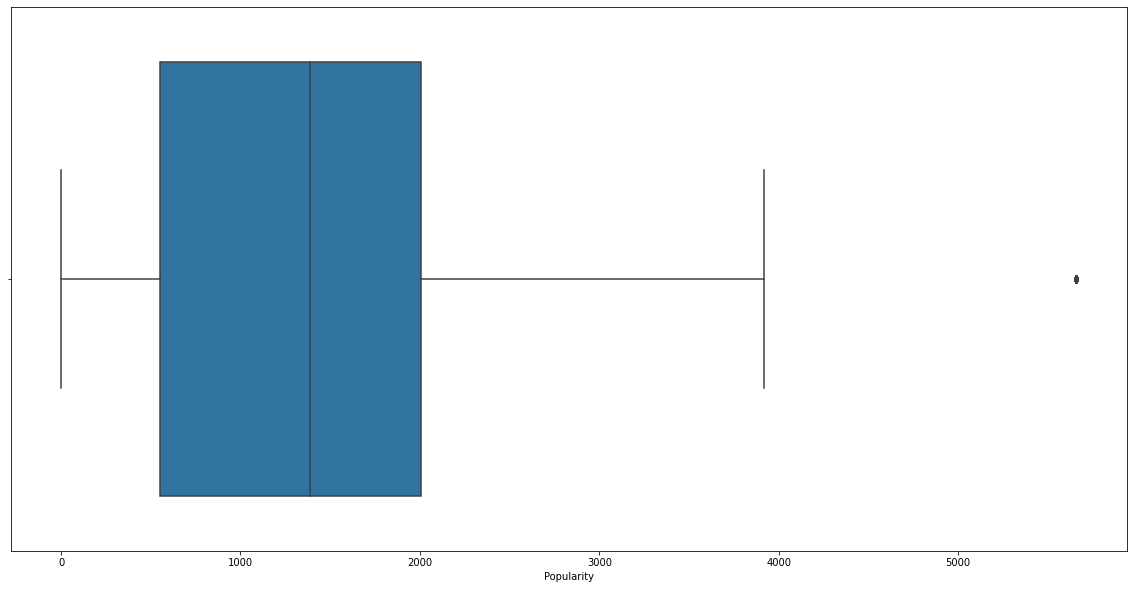

In [131]:
sns.boxplot(x=df['Popularity'])                                                   #Detecting outliers for the column 'Popularity'

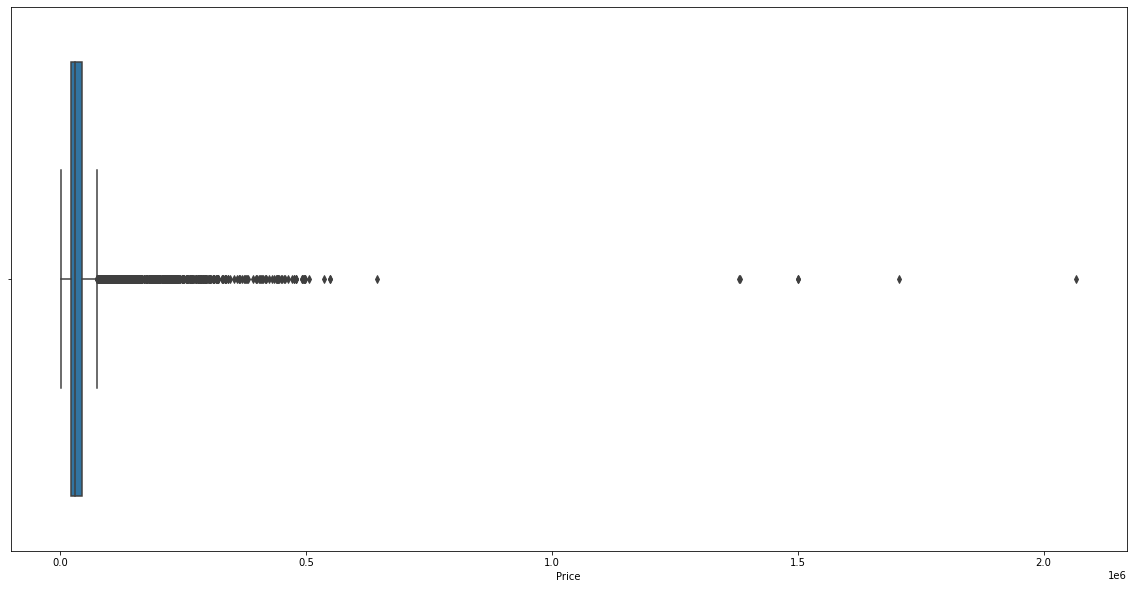

In [132]:
sns.boxplot(x=df['Price'])                                                        #Detecting outliers for the column 'Price'

In [133]:
Q1 = df.quantile(0.25)                                                             #Return values at the first quartile over requested axis
Q3 = df.quantile(0.75)                                                             #Return values at the third quartile over requested axis
IQR = Q3 - Q1                                                                      #Return values at Interquartile range over requested axis
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [134]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]             #Removing the outliers 1.5 times away from first and third quartile
((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).sum()                             #Checking number of outliers present after removal

Cylinders        0
Drive Mode       0
HP               0
MPG-C            0
MPG-H            0
Make             0
Model            0
Popularity       0
Price            0
Transmission     0
Vehicle Size     0
Vehicle Style    0
Year             0
dtype: int64

In [135]:
df.shape                                                                             #Rows and columns after removing outliers

(8546, 13)

# Step 6
### 6.1 Identifying the most represented car brands

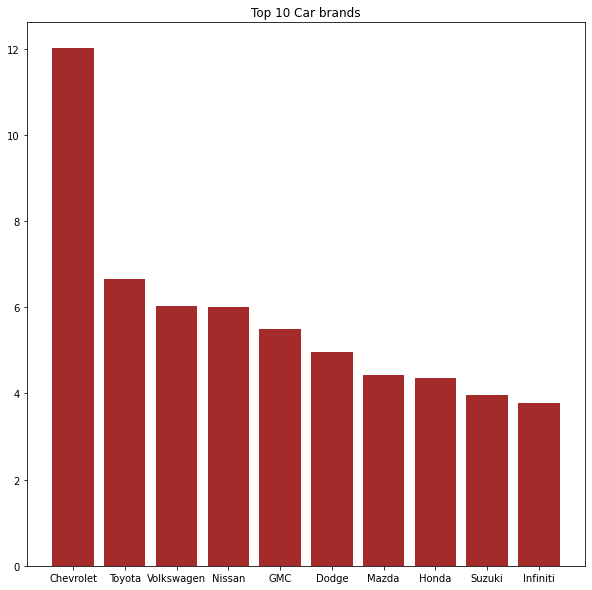

In [136]:
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())               #Percentage of car per brand
popular_cars = counts.index[:10]                                                    #Top 10 car brands
plt.figure(figsize=(10,10))                                                         #Modify the size for plotting
plt.bar(popular_cars, height=counts[:10], color='Brown')                      #Plotting bar graph
plt.title('Top 10 Car brands')
plt.show()

### 6.2 Finding average price among the top car brands

In [137]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# Step 7: Correlation matrix

In [138]:
df.corr()                                                                           #Correlation matrix

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


From the correlation matrix, certain conclusions depending on the values of correlation coefficient are obvious.

The columns that are **highly correlated** -


*   Cylinders and HP
*   MPG-H and MPG-C
*   HP and Price

The columns that are **moderately correlated** -


*   Year and Price



The columns that are **highly anticorrelated** -

*   Cylinders and MPG-H 
*   Cylinders and MPG-C

The columns that are **moderately anticorrelated** -

*   HP and MPG-C








# Step 8: Exploratory Data Analysis
### 8.1 **Heat map**
A heat map is a data visualization technique that shows magnitude of a phenomenon as colour in two dimensions. The variation in colour may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space.

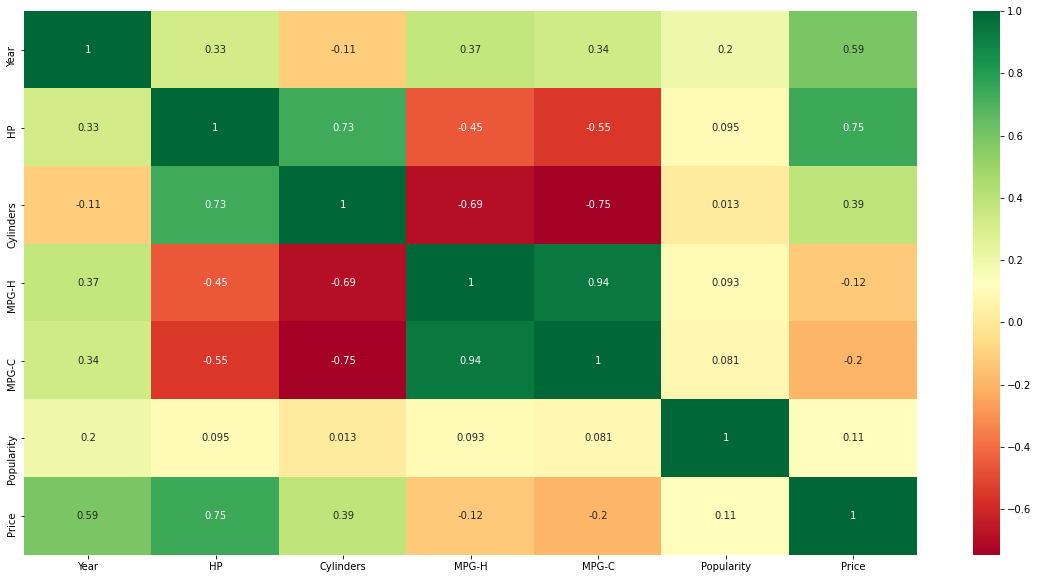

In [139]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)

From the heat map, the boxes that are **dark green** have higher correlation and **lighter green** boxes have **moderate correlation** whereas those are **dark red** have  **higher anticorrelation** and **lighter red** boxes have **moderate anticorrelation**. So, the conclusions derived from the correlation matrix in Step 7 are clearly verified.

### 8.2 **Scatter plot**

Scatter plots are used to find the correlation between two variables. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

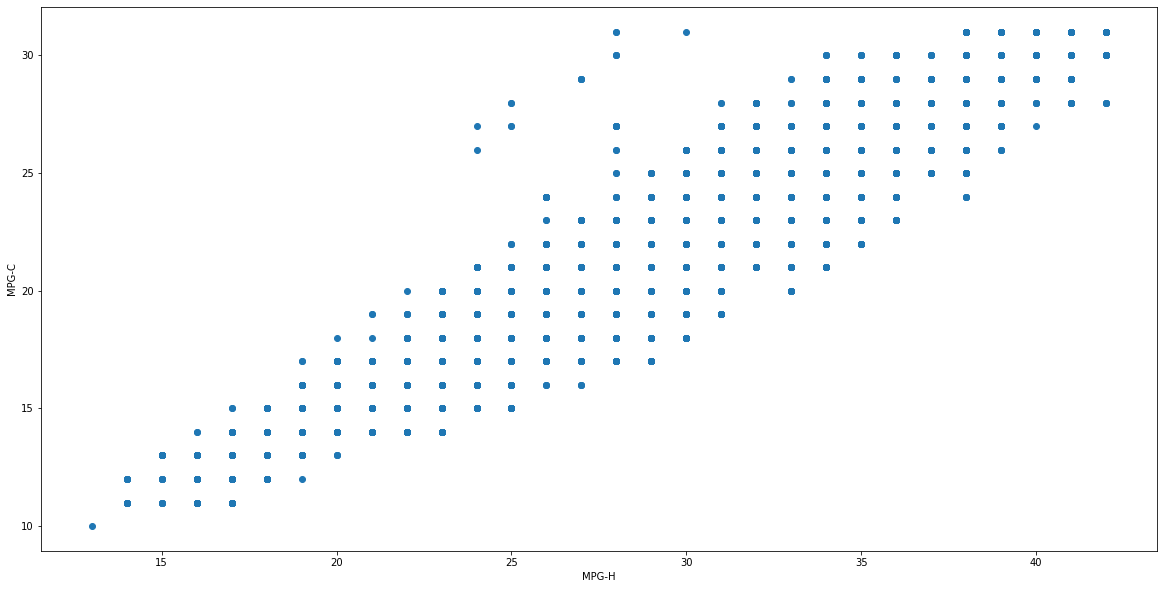

In [140]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['MPG-H'], df['MPG-C'])                                                 #Scatter plot between Highway MPG and City mpg
ax.set_xlabel('MPG-H')
ax.set_ylabel('MPG-C')
plt.show()

So, from the above scatter plot **high correlation** between **MPG-C and MPG-H** can clearly be seen.

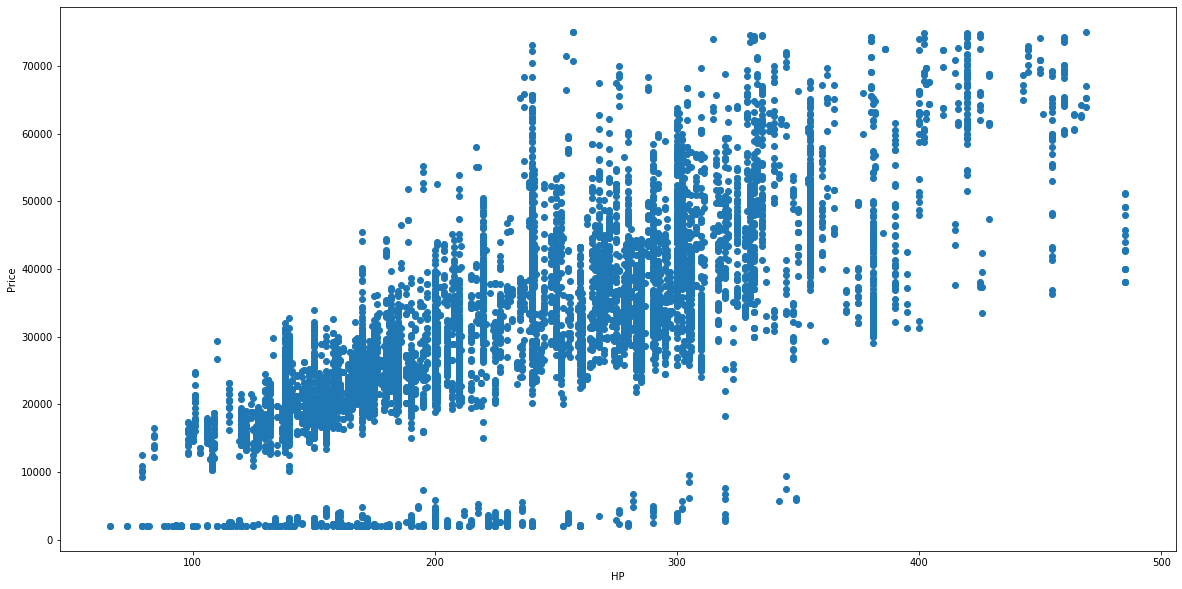

In [141]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['HP'], df['Price'])                                                 #Scatter plot between Horsepower and Price
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

From the above scatter plot, it can be seen **Price and HP** are two varibales that are **highly correlated**. A trend line can easily be drawn between the correlated columns.

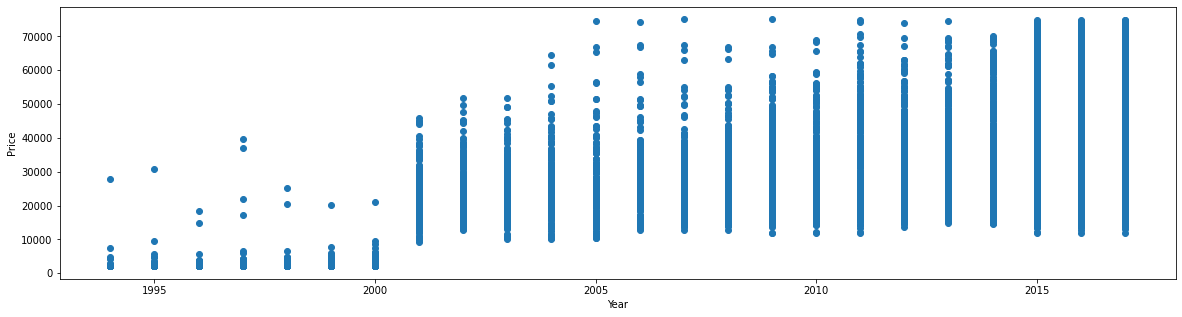

In [142]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(df['Year'], df['Price'])                                                 #Scatter plot between Year and Price
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

So, **Year** is **moderately correlated** with **Price**.

### 8.3 **Pie chart**
A pie chart is a circular statistical graphic, which is divided into slices to illustrate numerical proportion. Here, different **Vehicle Styles** are shown based on their weightage of the no. of cars sold. 

In [143]:
print(df['Vehicle Style'].value_counts())                                         #Calculating the total no. of vehicles under each vehicle style

Sedan                  2221
4dr SUV                2127
Coupe                   719
Crew Cab Pickup         546
4dr Hatchback           503
Convertible             454
Extended Cab Pickup     449
Wagon                   438
Passenger Minivan       326
2dr Hatchback           311
Regular Cab Pickup      243
Cargo Van                57
Passenger Van            47
2dr SUV                  42
Cargo Minivan            37
Convertible SUV          26
Name: Vehicle Style, dtype: int64


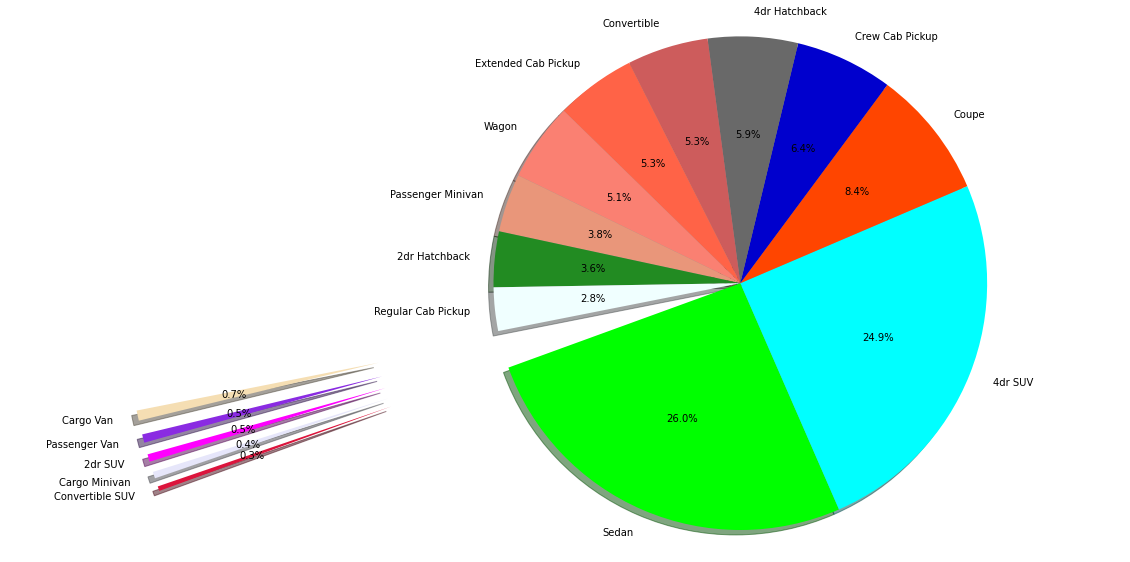

In [173]:
import random                                                                                                               #Random variable generators.                                                                                                                                                                                                                                                                               
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 20)                                                          #Random generation of different CSS4 colours where k denotes total no. of coloures required
labels = 'Sedan', '4dr SUV', 'Coupe', 'Crew Cab Pickup', '4dr Hatchback', 'Convertible', 'Extended Cab Pickup', 'Wagon', 'Passenger Minivan', '2dr Hatchback', 'Regular Cab Pickup', 'Cargo Van', 'Passenger Van', '2dr SUV', 'Cargo Minivan', 'Convertible SUV'
sizes = [2221, 2127, 719, 546, 503, 454, 449, 438, 326, 311, 243, 57, 47, 42, 37, 26]                                       #Weightage for different variables
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.5, 1.5, 1.5, 1.5, 1.5 )                                                       #Explode last five slices

# Plot
plt.pie(sizes, labels=labels, colors= colors, autopct='%1.1f%%', explode=explode, shadow=True, startangle=200)
plt.axis('equal')
plt.show()

From the Pie chart, we can see that **Sedan cars** were the **most sold** cars followed by **4dr SUV**.

### 8.4 **Count plot**
A count plot can be thought of as a histogram across a categorical , instead of quantitative variable. Here, relation between **Vehicle Type** and **Drive Mode** is shown.

Text(0.5, 0, 'Count of vehicles')

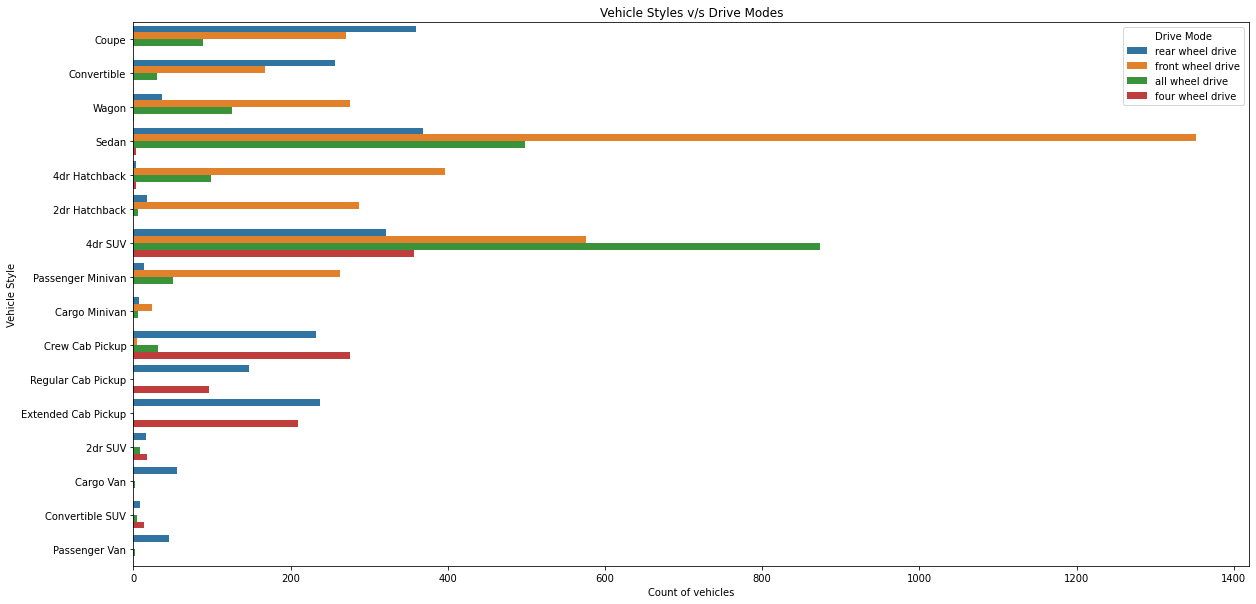

In [145]:
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Styles v/s Drive Modes")
plt.ylabel('Vehicle Style')
plt.xlabel('Count of vehicles')

From this plot, it is found out that in the **Sedan** vehicle style **front wheel drives** are most popular whereas in the **4 dr SUV**, **all wheel drives** are most popular.

### 8.5 **Bar Chart**
A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Here, a horizontal bar chart is shown to visualize the **Popularity** of different **Make**.

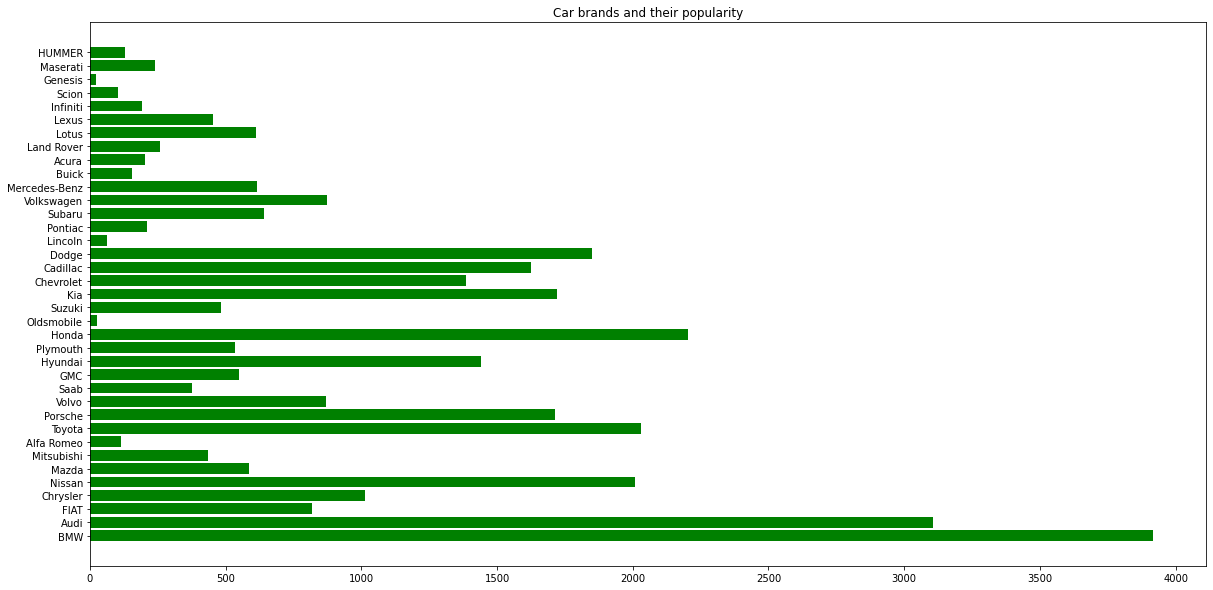

In [146]:
plt.barh((df['Make'].unique()), (df['Popularity'].unique()), color="Green")
plt.title('Car brands and their popularity')
plt.show()

From the graph, it is found out that **BMW** is the **most popular** car brand.

# Step 9: Building a machine learning model

In [147]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values                                  #Different independent features for ML model
y = df['Price'].values                                                                                      #Target variable

In [148]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [149]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [150]:
#Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

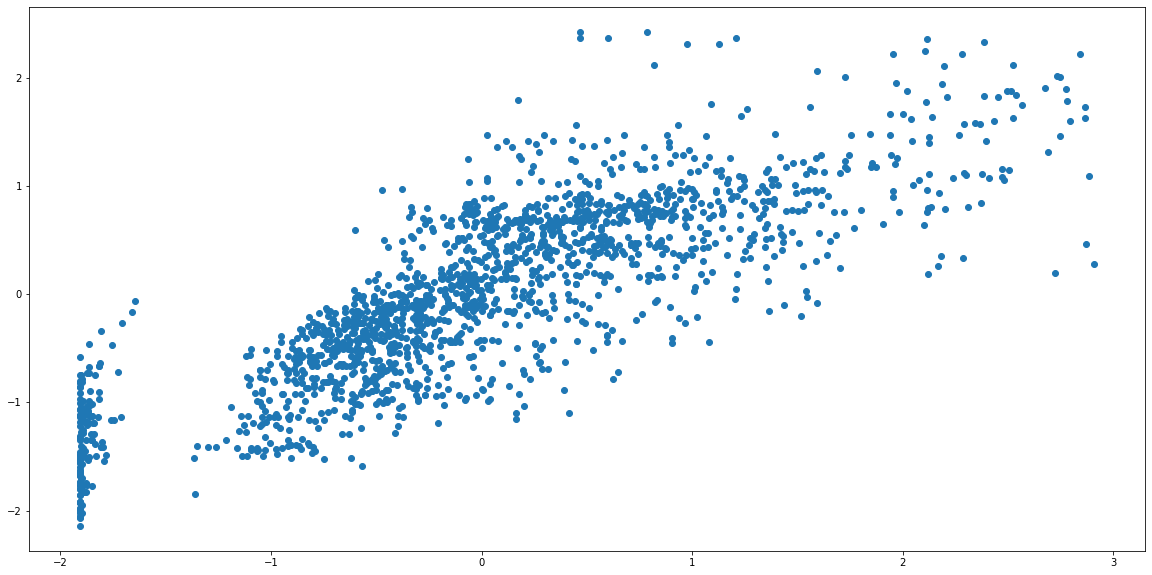

In [151]:
#Prediction on the Test set
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

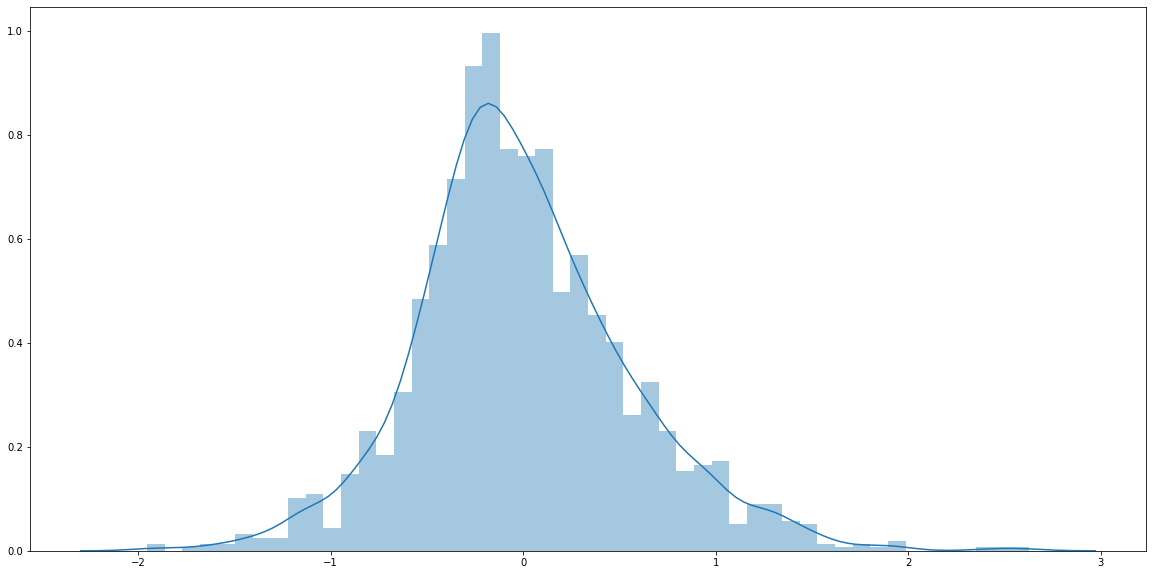

In [152]:
sns.distplot((y_test-y_pred),bins=50)                     

So, from the plot it can be seen that residuals are normally distributed.

In [153]:
#Performance metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


From the **R-squared value**, it can be said that approximately **68% of the data fit** the regression model.

# Step 10: Trying different algorithms and checking their performance over metrics
### 10.1 **Polynomial Regression**

In [154]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

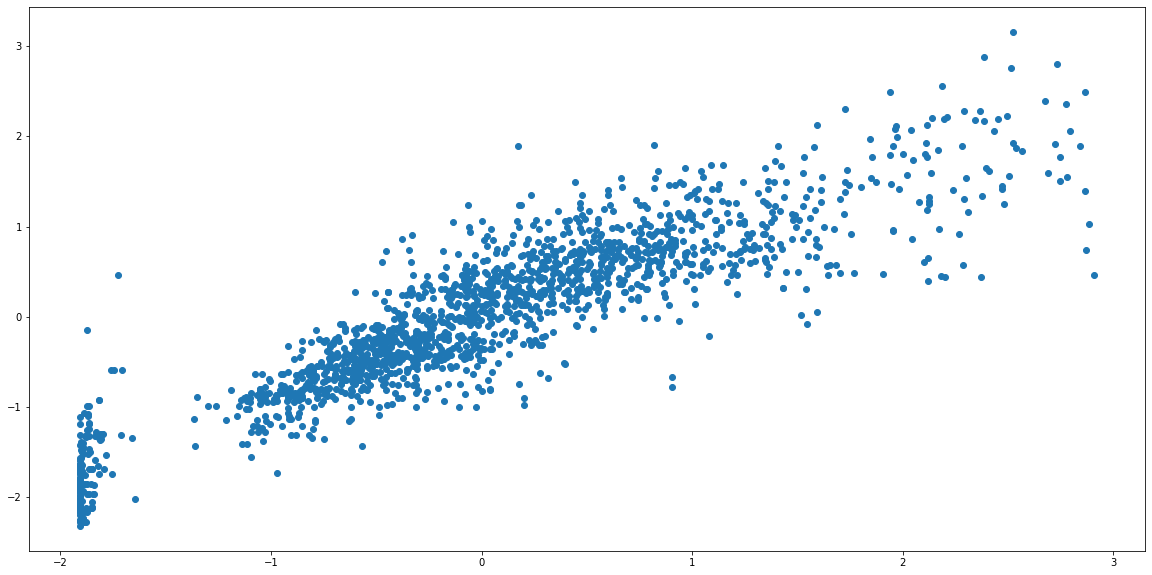

In [155]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

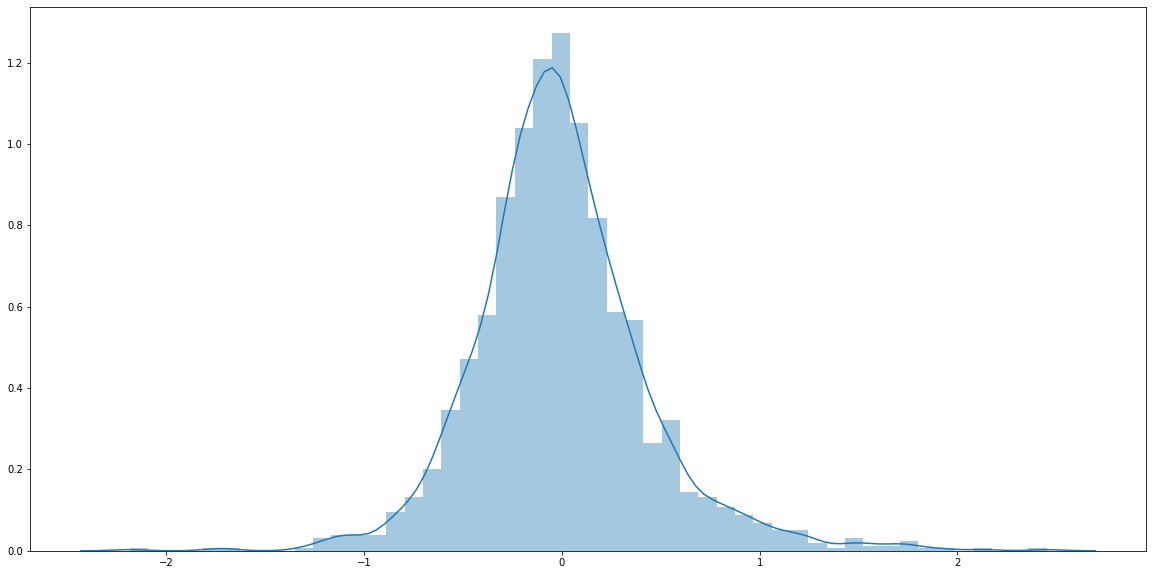

In [156]:
sns.distplot((y_test-y_pred),bins=50)

So, the errors are more normalised than Multiple Linear Regression.

In [157]:
#Performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


From the **R-squared value**, it can be said that approximately **80% of the data fit** the regression model.

### 10.2 **SVR**

In [158]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

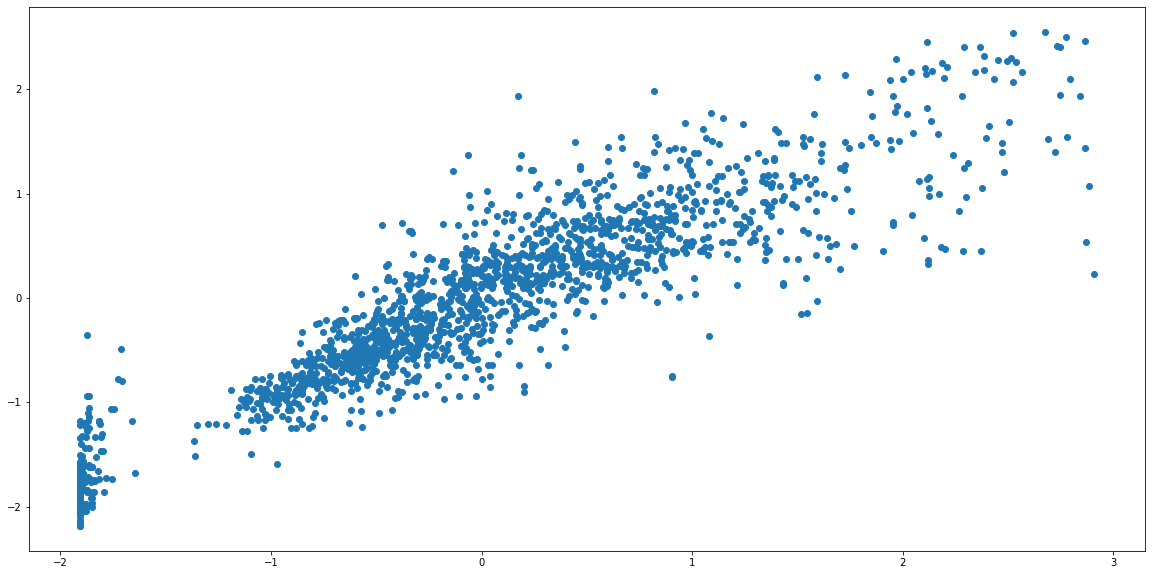

In [159]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

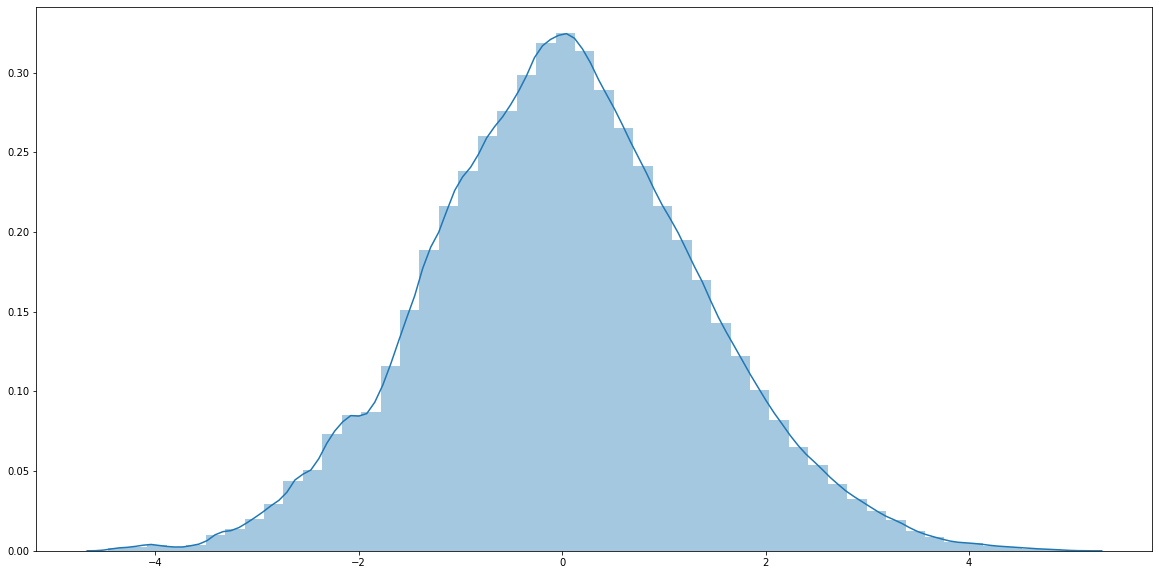

In [160]:
sns.distplot((y_test-y_pred),bins=50)

Here, the errors are more normalised than Polynomial Regression.

In [161]:
#Performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


From the **R-squared value**, it can be said that approximately **81% of the data fit** the regression model.

### 10.3 **Random Forest**

In [162]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

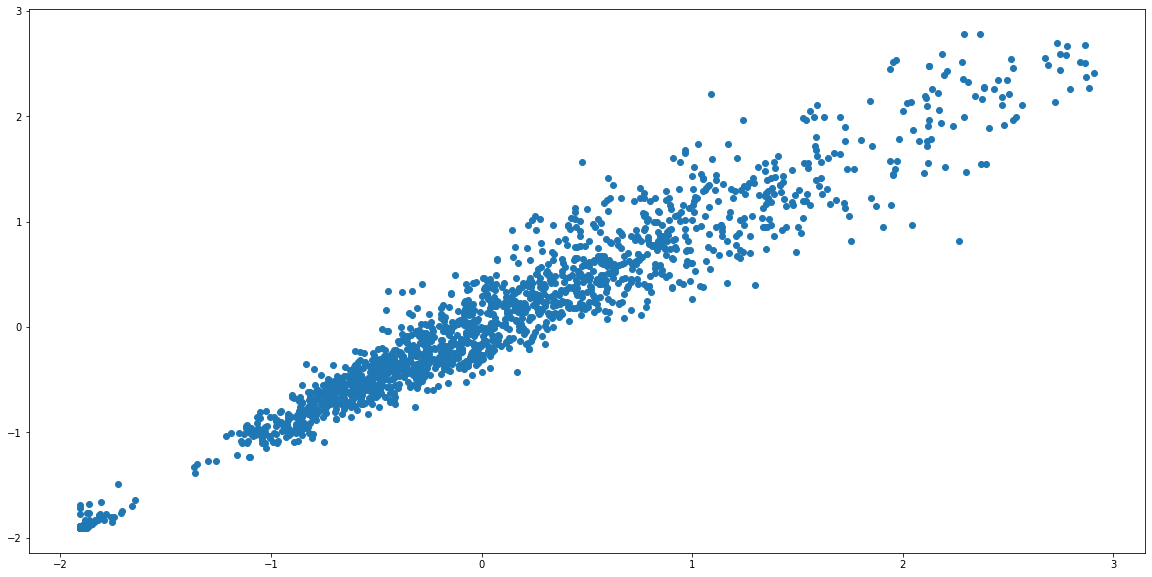

In [163]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

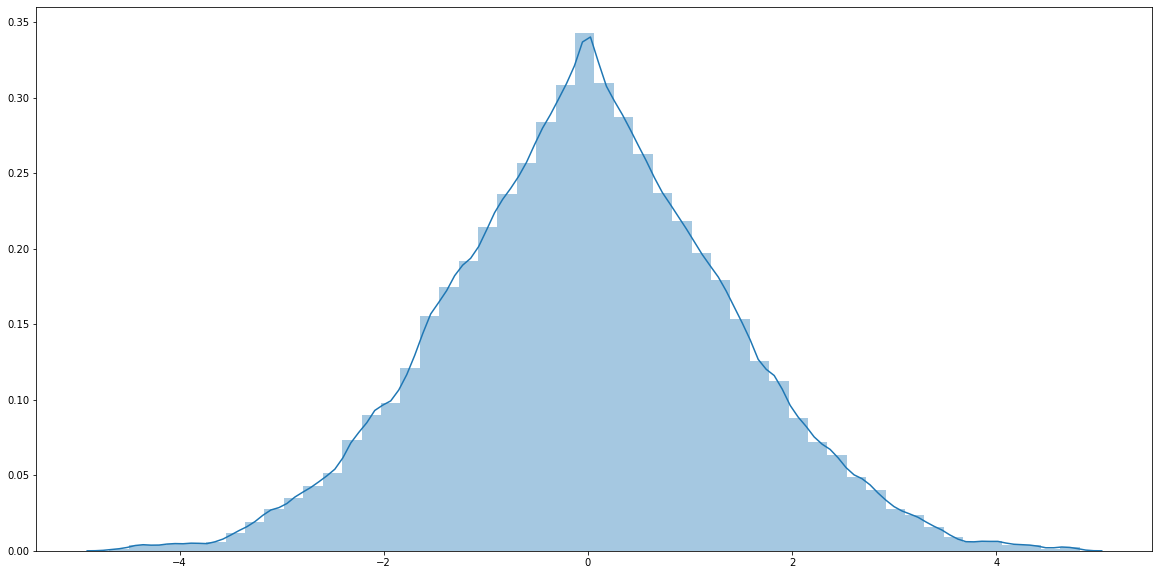

In [164]:
sns.distplot((y_test-y_pred),bins=50)

Here, the errors are perfectly normalised than the previous algorithms.

In [165]:
#Performance metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332


From the **R-squared value**, it can be said that approximately **94% of the data fit** the regression model.

So, we can finally conclude that **Random Forest** has **outperformed** all three previous algorithms.